<a href="https://colab.research.google.com/github/eshmaapps/ml/blob/main/goldendoodle_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

ModuleNotFoundError: ignored

In [6]:
!pip install keras.applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.6 MB/s 


In [12]:

from tensorflow import keras
from keras import layers
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input
#from keras.preprocessing.image import load_img, img_to_array


In [ ]:
!unzip golden.zip -d golden

In [16]:
!unzip modelweights.zip -d modelweights

Archive:  modelweights.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of modelweights.zip or
        modelweights.zip.zip, and cannot find modelweights.zip.ZIP, period.


In [14]:
# importing flower dataset
import pathlib
  
dataset_url = "/content/golden/golden/"
data_dir = pathlib.Path(dataset_url)

image_count = len(list(data_dir.glob('golden*/*.*')))
print(image_count)

dogs = list(data_dir.glob('goldendoodle/*'))


291


In [ ]:
PIL.Image.open(str(dogs[0]))

In [15]:
# Training split
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(180, 180),
    batch_size=32)

# Testing or Validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(180,180),
    batch_size=32)

class_names = train_ds.class_names
print(class_names)

Found 260 files belonging to 2 classes.
Using 208 files for training.
Found 260 files belonging to 2 classes.
Using 52 files for validation.
['goldendoodle', 'goldenretreiver']


In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
weightsUrl = "/content/modelweights/resnet50_weights_tf_dim_ordering_tf_kernels.h5"
model = ResNet50(weights=weightsUrl)

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [62]:

num_classes = len(class_names)
  
model = Sequential([
    layers.Rescaling(1./255, input_shape=(180,180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [39]:
!pip install -q streamlit

     |████████████████████████████████| 9.2 MB 9.4 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 4.7 MB 58.7 MB/s 
     |████████████████████████████████| 164 kB 81.5 MB/s 
     |████████████████████████████████| 182 kB 77.1 MB/s 
     |████████████████████████████████| 237 kB 74.1 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 5.5 MB/s 


In [41]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 6.8 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=54ca9a099abf8c5422104ae97ff9a5b6ffff55ad0ab3123047a345da8f2d77fa
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [63]:
!ngrok authtoken 2EuBkh4dDyaO8W08FbMuDmgU4NP_5pwyoprCYeR3eAWZzin7S

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

In [68]:
%%writefile streamlit_app.py
import streamlit as st 
st.markdown(""" This is a Streamlit App """)
uploaded_file = st.file_uploader("Choose a file")


Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py  & npx localtunnel --port 8501

2022-10-23 04:55:30.335 INFO    numexpr.utils: NumExpr defaulting to 2 threads.



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.83.145.224:8501



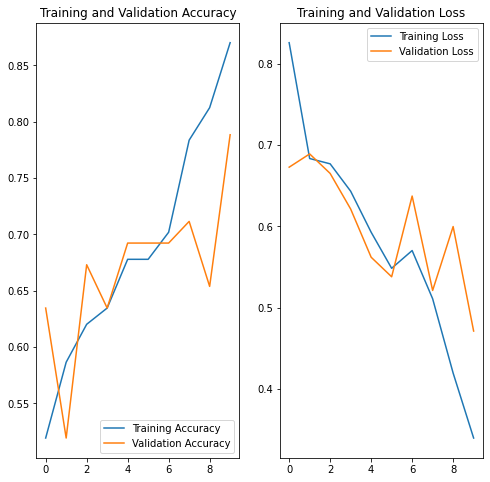

In [38]:
#Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
  
#loss
loss = history.history['loss']
val_loss = history.history['val_loss']
  
#epochs 
epochs_range = range(epochs)
  
#Plotting graphs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
  
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()